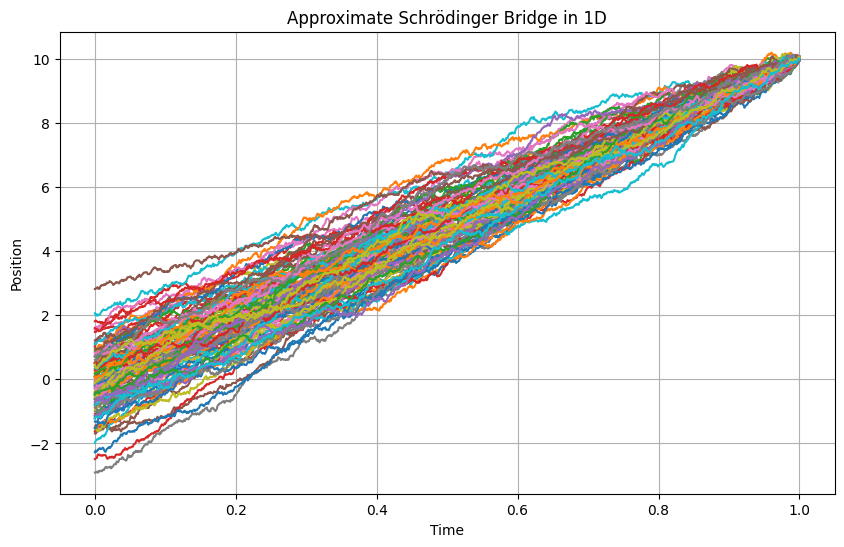

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
T = 1.0  # total time
dt = 0.001  # time step
N = int(T / dt)  # number of time steps
n_paths = 100  # number of paths to simulate

# Initial and final distributions (Gaussian parameters)
mu_init, sigma_init = 0, 1
mu_final, sigma_final = 10, 1

# Time array
time_array = np.linspace(0, T, N + 1)

# Initialize paths
paths = np.zeros((n_paths, N + 1))

# Generate paths
for i in range(n_paths):
    # Start from a sample from the initial distribution
    paths[i, 0] = np.random.normal(mu_init, sigma_init)
    
    for j in range(1, N + 1):
        # Standard Brownian increment (for reference measure)
        dW = np.sqrt(dt) * np.random.normal()
        
        # Drift term to guide paths towards the final distribution
        # This is a simplified way to approximate Schrödinger bridge in 1D
        drift = (mu_final - paths[i, j-1]) * dt / (T - time_array[j-1])
        
        # Update path
        paths[i, j] = paths[i, j-1] + drift + dW

# Plotting
plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(time_array, paths[i], label=f'Path {i+1}')
plt.title('Approximate Schrödinger Bridge in 1D')
plt.xlabel('Time')
plt.ylabel('Position')
# plt.legend()
plt.grid(True)
plt.show()
